In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print(f"matplotlib: mpl {plt.matplotlib.__version__}")
print('sklearn version:', sklearn.__version__)

font_path = "c:/Windows/Fonts/malgun.ttf"
font_prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

numpy version: 2.1.0
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib: mpl 3.9.2
sklearn version: 1.5.1


In [2]:
data = pd.read_csv('accident.csv')

In [3]:
data.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2014010100100005,2014년 1월 1일 00시,수요일,서울특별시 구로구 오류동,부상신고사고,0,0,0,2,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,31세,상해없음,승용,남,65세,부상신고
1,2014010100100029,2014년 1월 1일 01시,수요일,서울특별시 성동구 마장동,중상사고,0,1,3,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,32세,상해없음,승용,남,54세,중상
2,2014010100100050,2014년 1월 1일 02시,수요일,서울특별시 광진구 광장동,중상사고,0,1,0,4,차대차 - 추돌 - 진행중,...,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,여,26세,부상신고
3,2014010100100053,2014년 1월 1일 02시,수요일,서울특별시 구로구 개봉동,경상사고,0,0,2,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,29세,상해없음,승용,남,25세,경상
4,2014010100100054,2014년 1월 1일 02시,수요일,서울특별시 양천구 목동,경상사고,0,0,2,0,차대차 - 측면직각충돌,...,맑음,교차로 - 교차로안,승용,여,42세,상해없음,승용,남,37세,경상


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26270 entries, 0 to 26269
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        26270 non-null  int64 
 1   사고일시        26270 non-null  object
 2   요일          26270 non-null  object
 3   시군구         26270 non-null  object
 4   사고내용        26270 non-null  object
 5   사망자수        26270 non-null  int64 
 6   중상자수        26270 non-null  int64 
 7   경상자수        26270 non-null  int64 
 8   부상신고자수      26270 non-null  int64 
 9   사고유형        26270 non-null  object
 10  법규위반        26270 non-null  object
 11  노면상태        26270 non-null  object
 12  기상상태        26270 non-null  object
 13  도로형태        26270 non-null  object
 14  가해운전자 차종    26270 non-null  object
 15  가해운전자 성별    26270 non-null  object
 16  가해운전자 연령    26270 non-null  object
 17  가해운전자 상해정도  26270 non-null  object
 18  피해운전자 차종    24900 non-null  object
 19  피해운전자 성별    24900 non-null  object
 20  피해운전자 

In [5]:
target = data['피해운전자 상해정도']
input = data.drop(columns=['피해운전자 상해정도'])

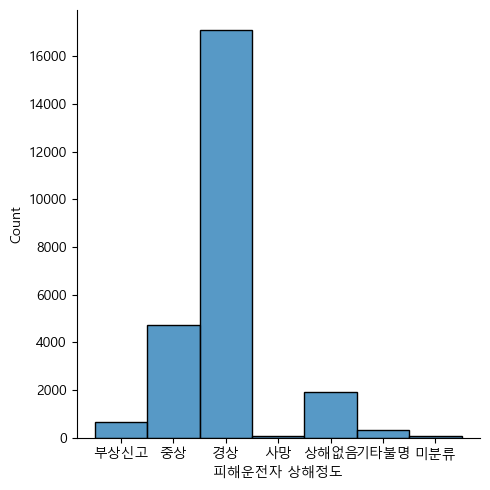

In [7]:
sns.displot(target)

In [14]:
input.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령
0,2014010100100005,2014년 1월 1일 00시,수요일,서울특별시 구로구 오류동,부상신고사고,0,0,0,2,차대차 - 기타,...,건조,맑음,단일로 - 기타,승용,남,31세,상해없음,승용,남,65세
1,2014010100100029,2014년 1월 1일 01시,수요일,서울특별시 성동구 마장동,중상사고,0,1,3,0,차대차 - 기타,...,기타,맑음,단일로 - 기타,승용,남,32세,상해없음,승용,남,54세
2,2014010100100050,2014년 1월 1일 02시,수요일,서울특별시 광진구 광장동,중상사고,0,1,0,4,차대차 - 추돌 - 진행중,...,건조,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,여,26세
3,2014010100100053,2014년 1월 1일 02시,수요일,서울특별시 구로구 개봉동,경상사고,0,0,2,0,차대차 - 기타,...,건조,맑음,단일로 - 기타,승용,남,29세,상해없음,승용,남,25세
4,2014010100100054,2014년 1월 1일 02시,수요일,서울특별시 양천구 목동,경상사고,0,0,2,0,차대차 - 측면직각충돌,...,건조,맑음,교차로 - 교차로안,승용,여,42세,상해없음,승용,남,37세


In [15]:
input.shape, target.shape

((26270, 21), (26270,))

In [17]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(input, target, test_size=0.2, random_state=42)

In [23]:
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((21016, 21), (5254, 21), (21016,), (5254,))

In [24]:
train_target

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령
7024,2016012700100513,2016년 1월 27일 20시,수요일,서울특별시 마포구 용강동,중상사고,0,1,0,0,차대차 - 추돌,...,건조,맑음,단일로 - 횡단보도부근,승용,남,45세,상해없음,승용,남,34세
7901,2016051100100034,2016년 5월 11일 03시,수요일,서울특별시 동대문구 용두동,중상사고,0,1,0,0,차대차 - 측면직각충돌,...,건조,맑음,교차로 - 교차로안,승용,여,27세,상해없음,승용,남,42세
12575,2018010500100413,2018년 1월 5일 19시,금요일,서울특별시 영등포구 문래동5가,경상사고,0,0,2,0,차대차 - 추돌,...,건조,맑음,단일로 - 기타,승용,남,40세,상해없음,화물,남,64세
4550,2015051300100008,2015년 5월 13일 00시,수요일,서울특별시 강남구 논현동,중상사고,0,1,2,0,차대차 - 기타,...,건조,맑음,단일로 - 기타,승용,남,42세,상해없음,승용,남,33세
5332,2015080300100376,2015년 8월 3일 16시,월요일,서울특별시 광진구 중곡동,경상사고,0,0,1,0,차대차 - 추돌 - 진행중,...,건조,맑음,단일로 - 기타,승용,남,52세,상해없음,자전거,남,56세
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,2021103000100029,2021년 10월 30일 02시,토요일,서울특별시 종로구 원남동,부상신고사고,0,0,0,1,차대차 - 추돌,...,건조,맑음,단일로 - 기타,이륜,남,20세 이하,상해없음,승용,남,57세
5390,2015081200100004,2015년 8월 12일 00시,수요일,서울특별시 강서구 방화동,경상사고,0,0,1,0,차대사람 - 기타,...,건조,맑음,기타 - 기타,화물,남,34세,상해없음,보행자,남,45세
860,2014041500100203,2014년 4월 15일 10시,화요일,서울특별시 강남구 역삼동,경상사고,0,0,1,0,차대사람 - 기타,...,건조,맑음,단일로 - 기타,승용,남,34세,상해없음,보행자,여,70세
15795,2019031800100044,2019년 3월 18일 03시,월요일,서울특별시 성북구 종암동,경상사고,0,0,2,0,차대차 - 추돌,...,건조,맑음,교차로 - 교차로부근,승용,남,37세,상해없음,승용,남,49세
